In [4]:
if 'google.colab' in str(get_ipython()):
    import sys
    from google.colab import drive, output
    drive.mount('/content/drive')

    !pip install umap-learn
    !pip install umap-learn[plot]
    !pip install holoviews

    !pip install joypy
    # !pip install umap-learn
    output.clear()
    print("Running on colab")
    %load_ext autoreload
    %autoreload 1
    %cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Results')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Figures')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Result')
elif "zmqshell" in str(get_ipython()):
    print("Running on MIRP")
    root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics/Jaguas"
    root_path = "media/mirp_ai/Seagate Desktop Drive/Jaguas_2018"
else:
    import pathlib
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    print("Running local")

Running on MIRP


In [5]:
root_audios = f"{root}/Complementary_Files/Audios_Jaguas/Audios_Jaguas.csv"
root_recorders = f"{root}/Complementary_Files/df_grabadoras_reg.csv"

ecological_integrity = f"{root}/Complementary_Files/Indice_Integridad_Ecologica.xlsx"

audios = pd.read_csv(root_audios, index_col=0)
recorders = pd.read_csv(root_recorders, sep=";")
ei  = pd.read_excel(ecological_integrity)

audios.set_index("Filename", inplace=True)

# AE

### Covers

In [8]:
accuracies_ae_covers = np.load(f"{root}/temporal/classification_results/accuracies_ae_unflat_covers.npy")
f1_scores_ae_covers = np.load(f"{root}/temporal/classification_results/f1_scores_ae_unflat_covers.npy")
recalls_ae_covers = np.load(f"{root}/temporal/classification_results/recalls_ae_unflat_covers.npy")

### Hours

In [9]:
accuracies_ae_hours = np.load(f"{root}/temporal/classification_results/accuracies_ae_unflat_hours.npy")
f1_scores_ae_hours = np.load(f"{root}/temporal/classification_results/f1_scores_ae_unflat_hours.npy")
recalls_ae_hours = np.load(f"{root}/temporal/classification_results/recalls_ae_unflat_hours.npy")

# VGGISH

### Covers

In [10]:
accuracies_vgg_covers = np.load(f"{root}/temporal/classification_results/accuracies_vgg_covers.npy")
f1_scores_vgg_covers = np.load(f"{root}/temporal/classification_results/f1_scores_vgg_covers.npy")
recalls_vgg_covers = np.load(f"{root}/temporal/classification_results/recalls_vgg_covers.npy")

### Hours

In [11]:
accuracies_vgg_hours = np.load(f"{root}/temporal/classification_results/accuracies_vgg_hours.npy")
f1_scores_vgg_hours = np.load(f"{root}/temporal/classification_results/f1_scores_vgg_hours.npy")
recalls_vgg_hours = np.load(f"{root}/temporal/classification_results/recalls_vgg_hours.npy")

# Acoustic Indices (AIs)

### Covers

In [12]:
accuracies_ai_covers = np.load(f"{root}/temporal/classification_results/accuracies_ai_covers.npy")
f1_scores_ai_covers = np.load(f"{root}/temporal/classification_results/f1_scores_ai_covers.npy")
recalls_ai_covers = np.load(f"{root}/temporal/classification_results/recalls_ai_covers.npy")

### Hours

In [14]:
accuracies_ai_hours = np.load(f"{root}/temporal/classification_results/accuracies_ai_hours.npy")
f1_scores_ai_hours = np.load(f"{root}/temporal/classification_results/f1_scores_ai_hours.npy")
recalls_ai_hours = np.load(f"{root}/temporal/classification_results/recalls_ai_hours.npy")

# Graphics Covers

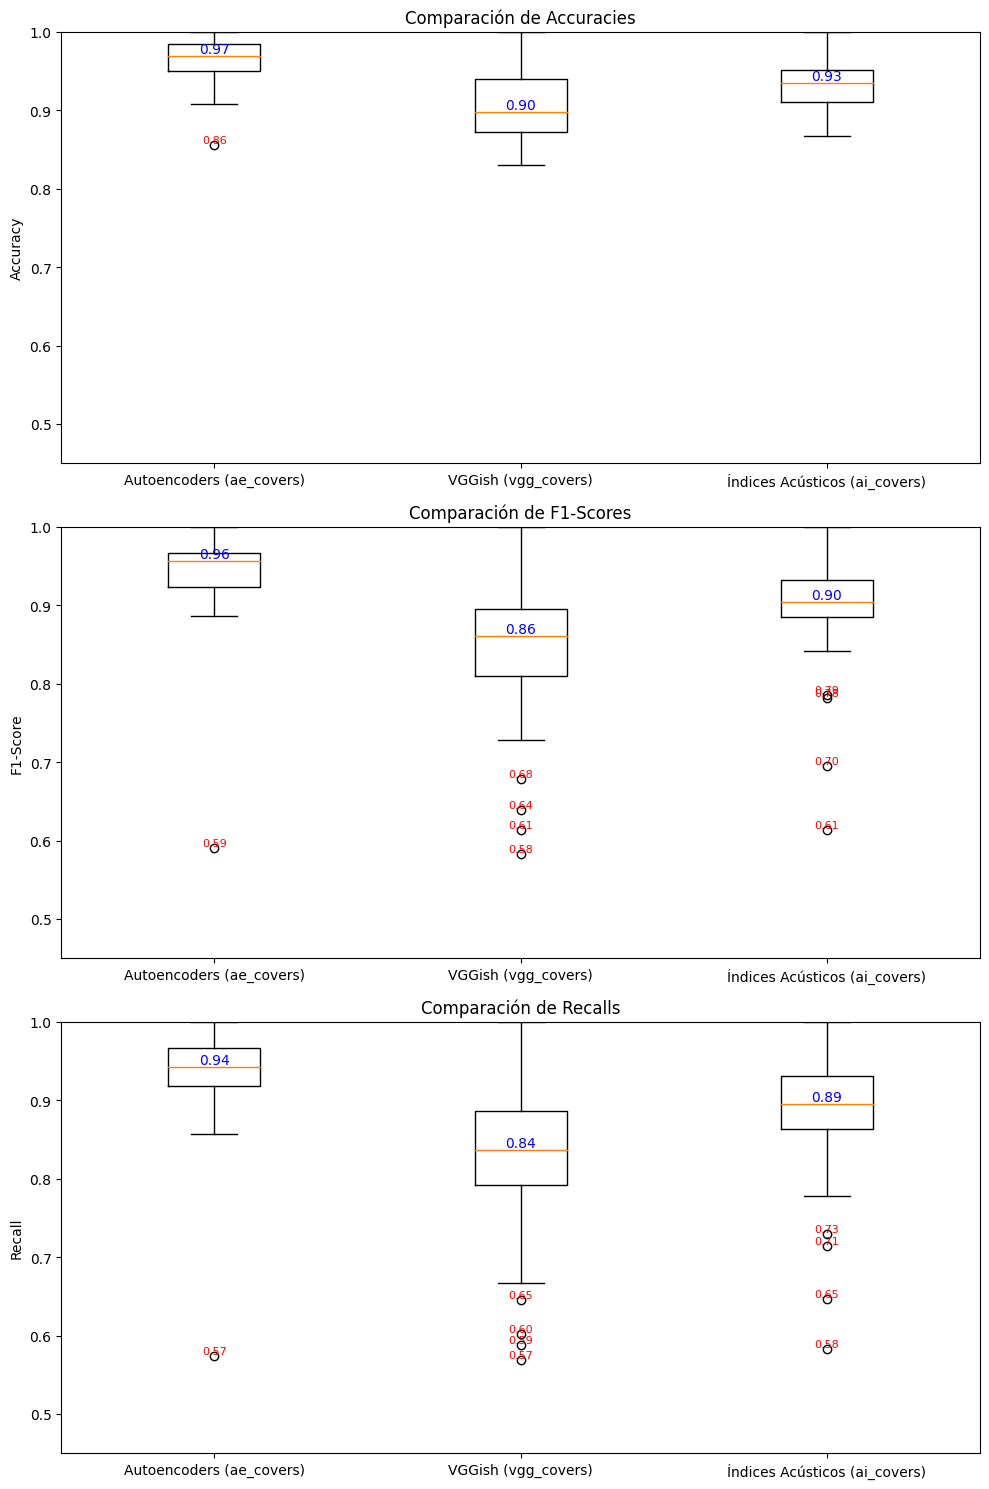

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Establecer límites del eje y
y_min = 0.45
y_max = 1

# Función para agregar anotaciones de mediana y outliers
def add_annotations(ax, data):
    for i, d in enumerate(data):
        # Añadir la mediana
        median = np.median(d)
        ax.text(i + 1, median, f'{median:.2f}', ha='center', va='bottom', color='blue', fontsize=10)
        
        # Añadir los outliers
        outliers = [point for point in d if point > np.percentile(d, 75) + 1.5 * (np.percentile(d, 75) - np.percentile(d, 25)) or point < np.percentile(d, 25) - 1.5 * (np.percentile(d, 75) - np.percentile(d, 25))]
        for outlier in outliers:
            ax.text(i + 1, outlier, f'{outlier:.2f}', ha='center', va='bottom', color='red', fontsize=8)

# Gráfica de accuracies
bp_acc = axs[0].boxplot([accuracies_ae_covers, accuracies_vgg_covers, accuracies_ai_covers], labels=['Autoencoders (ae_covers)', 'VGGish (vgg_covers)', 'Índices Acústicos (ai_covers)'])
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[0], [accuracies_ae_covers, accuracies_vgg_covers, accuracies_ai_covers])

# Gráfica de F1-scores
bp_f1 = axs[1].boxplot([f1_scores_ae_covers, f1_scores_vgg_covers, f1_scores_ai_covers], labels=['Autoencoders (ae_covers)', 'VGGish (vgg_covers)', 'Índices Acústicos (ai_covers)'])
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[1], [f1_scores_ae_covers, f1_scores_vgg_covers, f1_scores_ai_covers])

# Gráfica de Recalls
bp_rec = axs[2].boxplot([recalls_ae_covers, recalls_vgg_covers, recalls_ai_covers], labels=['Autoencoders (ae_covers)', 'VGGish (vgg_covers)', 'Índices Acústicos (ai_covers)'])
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[2], [recalls_ae_covers, recalls_vgg_covers, recalls_ai_covers])

# Mostrar las gráficas
plt.tight_layout()
plt.show()

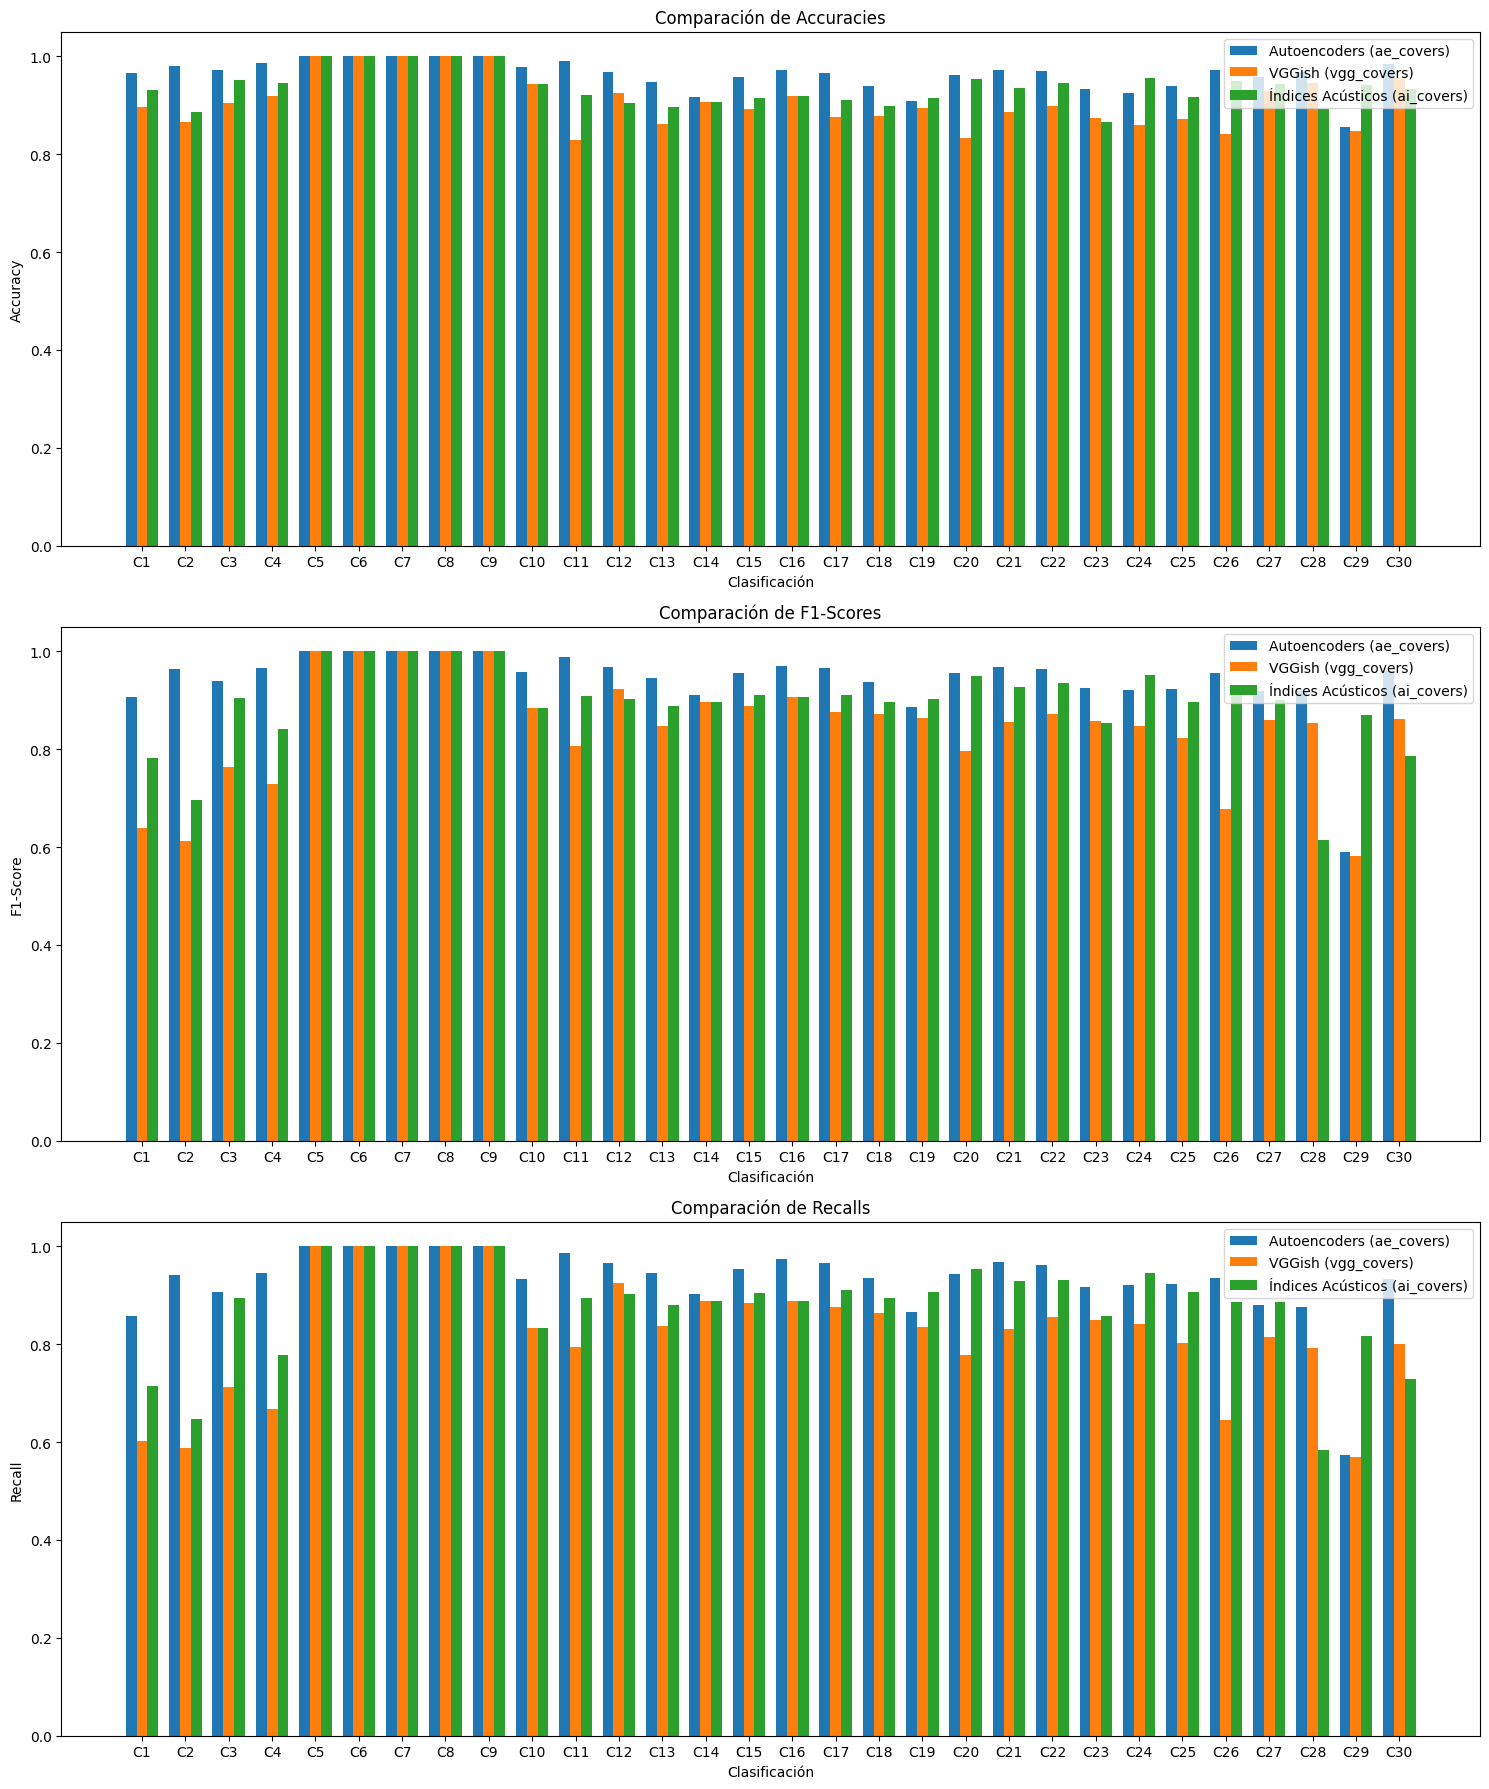

In [16]:
n = len(accuracies_ae_covers)

# Posiciones para las barras
ind = np.arange(n)  # la posición de las barras en el eje X
width = 0.25  # el ancho de las barras

fig, axs = plt.subplots(3, 1, figsize=(15, 18))

# Gráfica de accuracies
axs[0].bar(ind - width, accuracies_ae_covers, width, label='Autoencoders (ae_covers)')
axs[0].bar(ind, accuracies_vgg_covers, width, label='VGGish (vgg_covers)')
axs[0].bar(ind + width, accuracies_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Clasificación')
axs[0].set_xticks(ind)
axs[0].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[0].legend(loc='best')

# Gráfica de F1-scores
axs[1].bar(ind - width, f1_scores_ae_covers, width, label='Autoencoders (ae_covers)')
axs[1].bar(ind, f1_scores_vgg_covers, width, label='VGGish (vgg_covers)')
axs[1].bar(ind + width, f1_scores_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_xlabel('Clasificación')
axs[1].set_xticks(ind)
axs[1].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[1].legend(loc='best')

# Gráfica de Recalls
axs[2].bar(ind - width, recalls_ae_covers, width, label='Autoencoders (ae_covers)')
axs[2].bar(ind, recalls_vgg_covers, width, label='VGGish (vgg_covers)')
axs[2].bar(ind + width, recalls_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_xlabel('Clasificación')
axs[2].set_xticks(ind)
axs[2].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[2].legend(loc='best')

# Ajustar la disposición de las gráficas
plt.tight_layout()
plt.show()

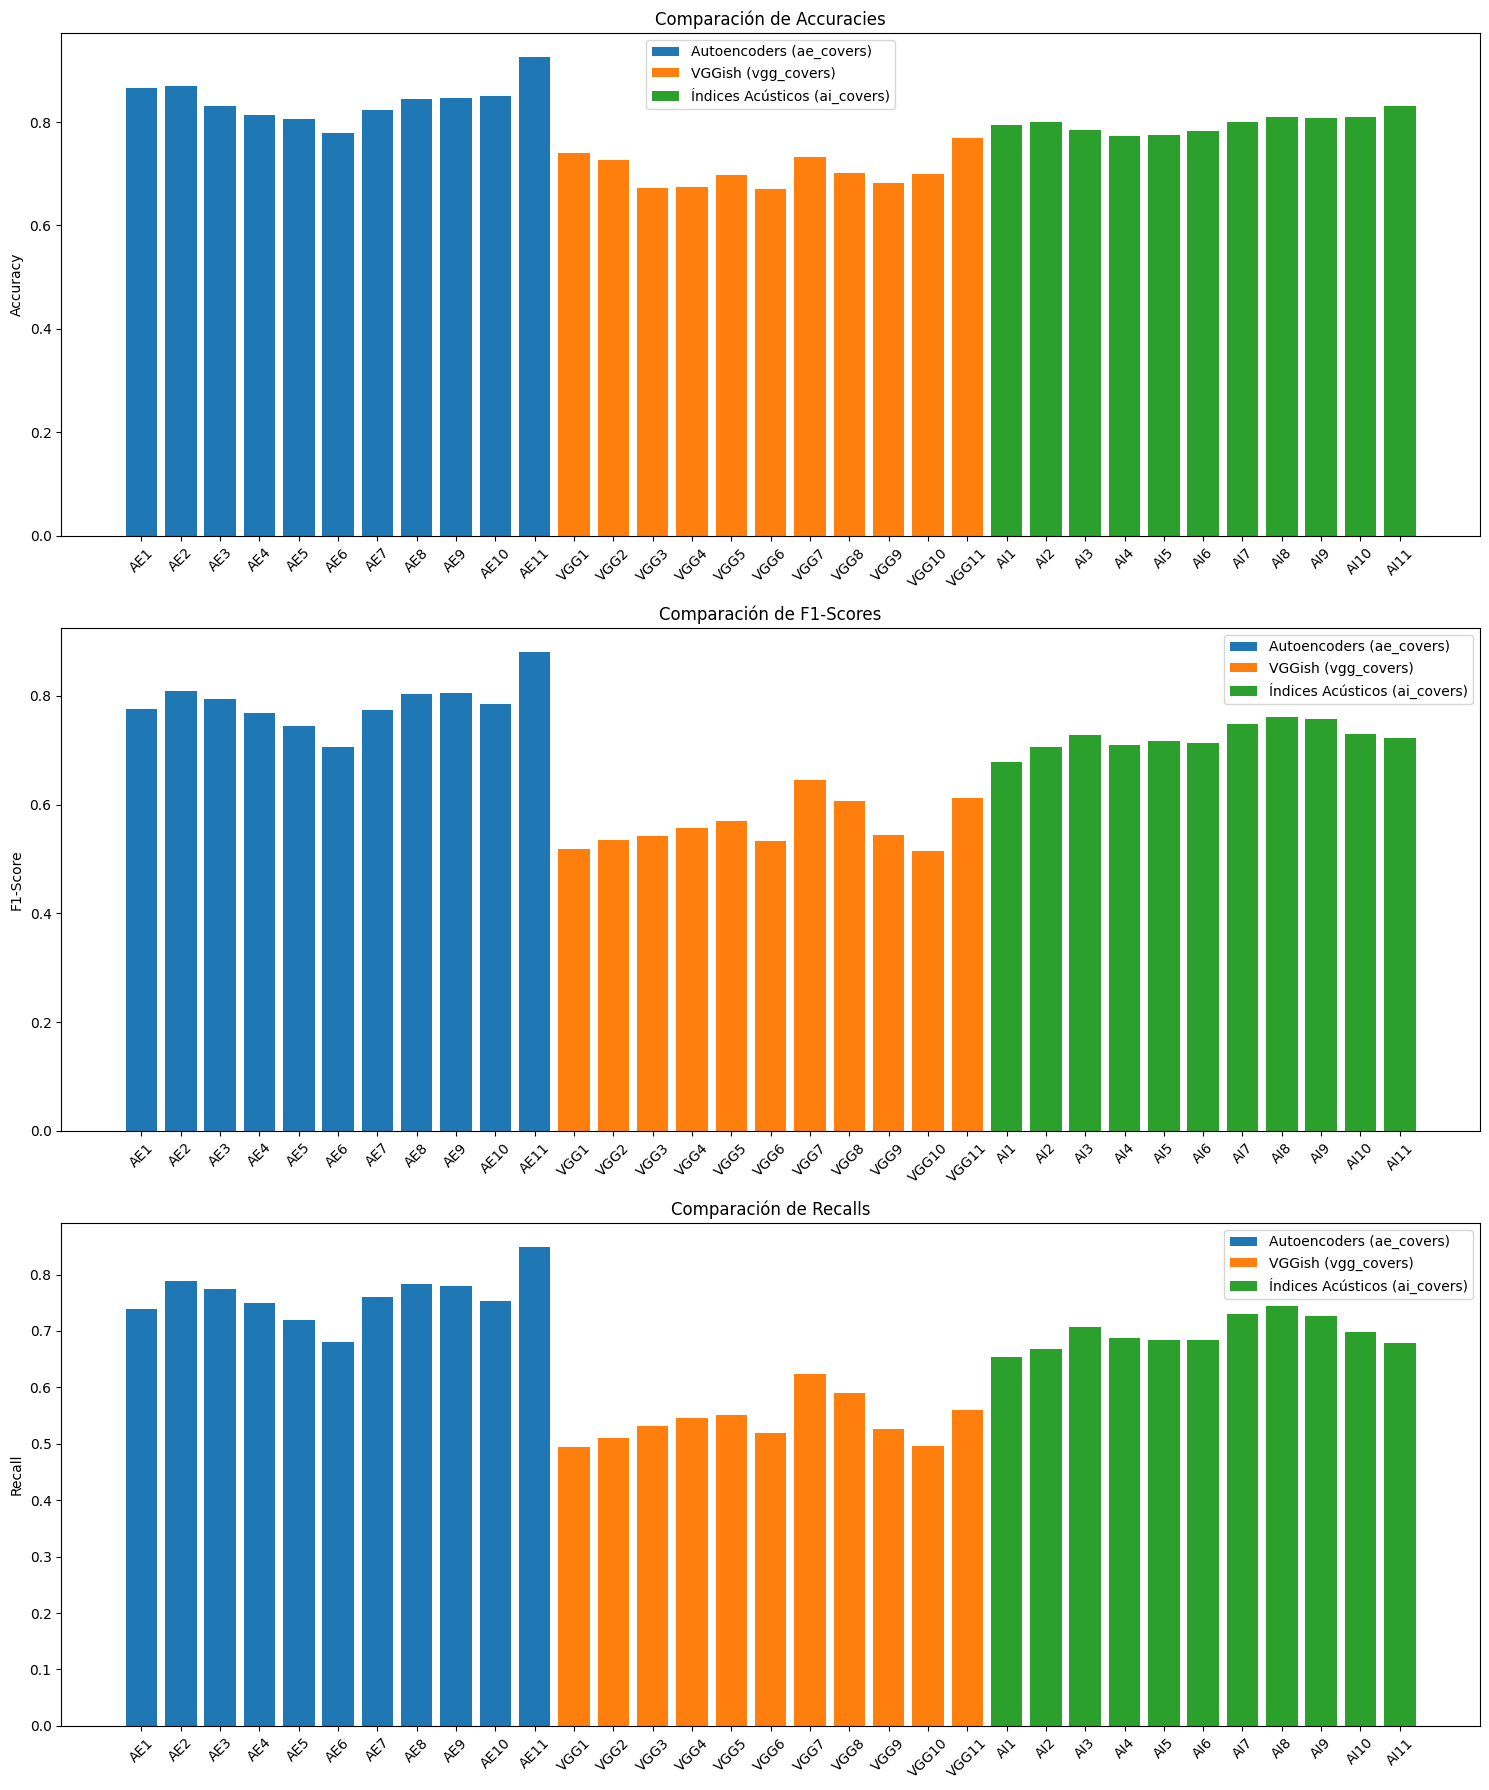

In [11]:
n = len(accuracies_ae_covers)

# Posiciones para las barras en el eje X
ind_ae = np.arange(n)  # Posiciones de las barras para el método AE
ind_vgg = np.arange(n, 2*n)  # Posiciones de las barras para el método VGGish
ind_ai = np.arange(2*n, 3*n)  # Posiciones de las barras para el método AI

# Ancho de las barras
width = 0.8  # el ancho de las barras, más amplio para que las barras estén más juntas dentro de cada grupo

fig, axs = plt.subplots(3, 1, figsize=(15, 18))

# Gráfica de accuracies
axs[0].bar(ind_ae, accuracies_ae_covers, width, label='Autoencoders (ae_covers)')
axs[0].bar(ind_vgg, accuracies_vgg_covers, width, label='VGGish (vgg_covers)')
axs[0].bar(ind_ai, accuracies_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[0].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[0].legend(loc='best')

# Gráfica de F1-scores
axs[1].bar(ind_ae, f1_scores_ae_covers, width, label='Autoencoders (ae_covers)')
axs[1].bar(ind_vgg, f1_scores_vgg_covers, width, label='VGGish (vgg_covers)')
axs[1].bar(ind_ai, f1_scores_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[1].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[1].legend(loc='best')

# Gráfica de Recalls
axs[2].bar(ind_ae, recalls_ae_covers, width, label='Autoencoders (ae_covers)')
axs[2].bar(ind_vgg, recalls_vgg_covers, width, label='VGGish (vgg_covers)')
axs[2].bar(ind_ai, recalls_ai_covers, width, label='Índices Acústicos (ai_covers)')
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[2].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[2].legend(loc='best')

# Ajustar la disposición de las gráficas
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import friedmanchisquare, wilcoxon
friedman_acc = friedmanchisquare(accuracies_ae_covers, accuracies_vgg_covers, accuracies_ai_covers)
friedman_f1 = friedmanchisquare(f1_scores_ae_covers, f1_scores_vgg_covers, f1_scores_ai_covers)
friedman_rec = friedmanchisquare(recalls_ae_covers, recalls_vgg_covers, recalls_ai_covers)

print(f"Friedman Test for Accuracies: Statistic={friedman_acc.statistic}, p-value={friedman_acc.pvalue}")
print(f"Friedman Test for F1-Scores: Statistic={friedman_f1.statistic}, p-value={friedman_f1.pvalue}")
print(f"Friedman Test for Recalls: Statistic={friedman_rec.statistic}, p-value={friedman_rec.pvalue}")

Friedman Test for Accuracies: Statistic=35.896907216494824, p-value=1.6035615684526164e-08
Friedman Test for F1-Scores: Statistic=35.896907216494824, p-value=1.6035615684526164e-08
Friedman Test for Recalls: Statistic=33.83505154639178, p-value=4.4958509967793526e-08


In [18]:
wilcoxon_acc_ae_vgg = wilcoxon(accuracies_ae_covers, accuracies_vgg_covers)
wilcoxon_acc_ae_ai = wilcoxon(accuracies_ae_covers, accuracies_ai_covers)

wilcoxon_f1_ae_vgg = wilcoxon(f1_scores_ae_covers, f1_scores_vgg_covers)
wilcoxon_f1_ae_ai = wilcoxon(f1_scores_ae_covers, f1_scores_ai_covers)

wilcoxon_rec_ae_vgg = wilcoxon(recalls_ae_covers, recalls_vgg_covers)
wilcoxon_rec_ae_ai = wilcoxon(recalls_ae_covers, recalls_ai_covers)

print(f"Wilcoxon Test Accuracies AE vs VGG: Statistic={wilcoxon_acc_ae_vgg.statistic}, p-value={wilcoxon_acc_ae_vgg.pvalue}")
print(f"Wilcoxon Test Accuracies AE vs AI: Statistic={wilcoxon_acc_ae_ai.statistic}, p-value={wilcoxon_acc_ae_ai.pvalue}")

print(f"Wilcoxon Test F1-Scores AE vs VGG: Statistic={wilcoxon_f1_ae_vgg.statistic}, p-value={wilcoxon_f1_ae_vgg.pvalue}")
print(f"Wilcoxon Test F1-Scores AE vs AI: Statistic={wilcoxon_f1_ae_ai.statistic}, p-value={wilcoxon_f1_ae_ai.pvalue}")

print(f"Wilcoxon Test Recalls AE vs VGG: Statistic={wilcoxon_rec_ae_vgg.statistic}, p-value={wilcoxon_rec_ae_vgg.pvalue}")
print(f"Wilcoxon Test Recalls AE vs AI: Statistic={wilcoxon_rec_ae_ai.statistic}, p-value={wilcoxon_rec_ae_ai.pvalue}")

Wilcoxon Test Accuracies AE vs VGG: Statistic=0.0, p-value=1.2290322210248409e-05
Wilcoxon Test Accuracies AE vs AI: Statistic=34.0, p-value=0.0005451350295901154
Wilcoxon Test F1-Scores AE vs VGG: Statistic=0.0, p-value=1.2290322210248409e-05
Wilcoxon Test F1-Scores AE vs AI: Statistic=34.0, p-value=0.0005451350295901154
Wilcoxon Test Recalls AE vs VGG: Statistic=0.0, p-value=1.2290322210248409e-05
Wilcoxon Test Recalls AE vs AI: Statistic=43.0, p-value=0.0013027378387956868


/home/mirp_ai/anaconda3/envs/DANM/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Graphics Hours

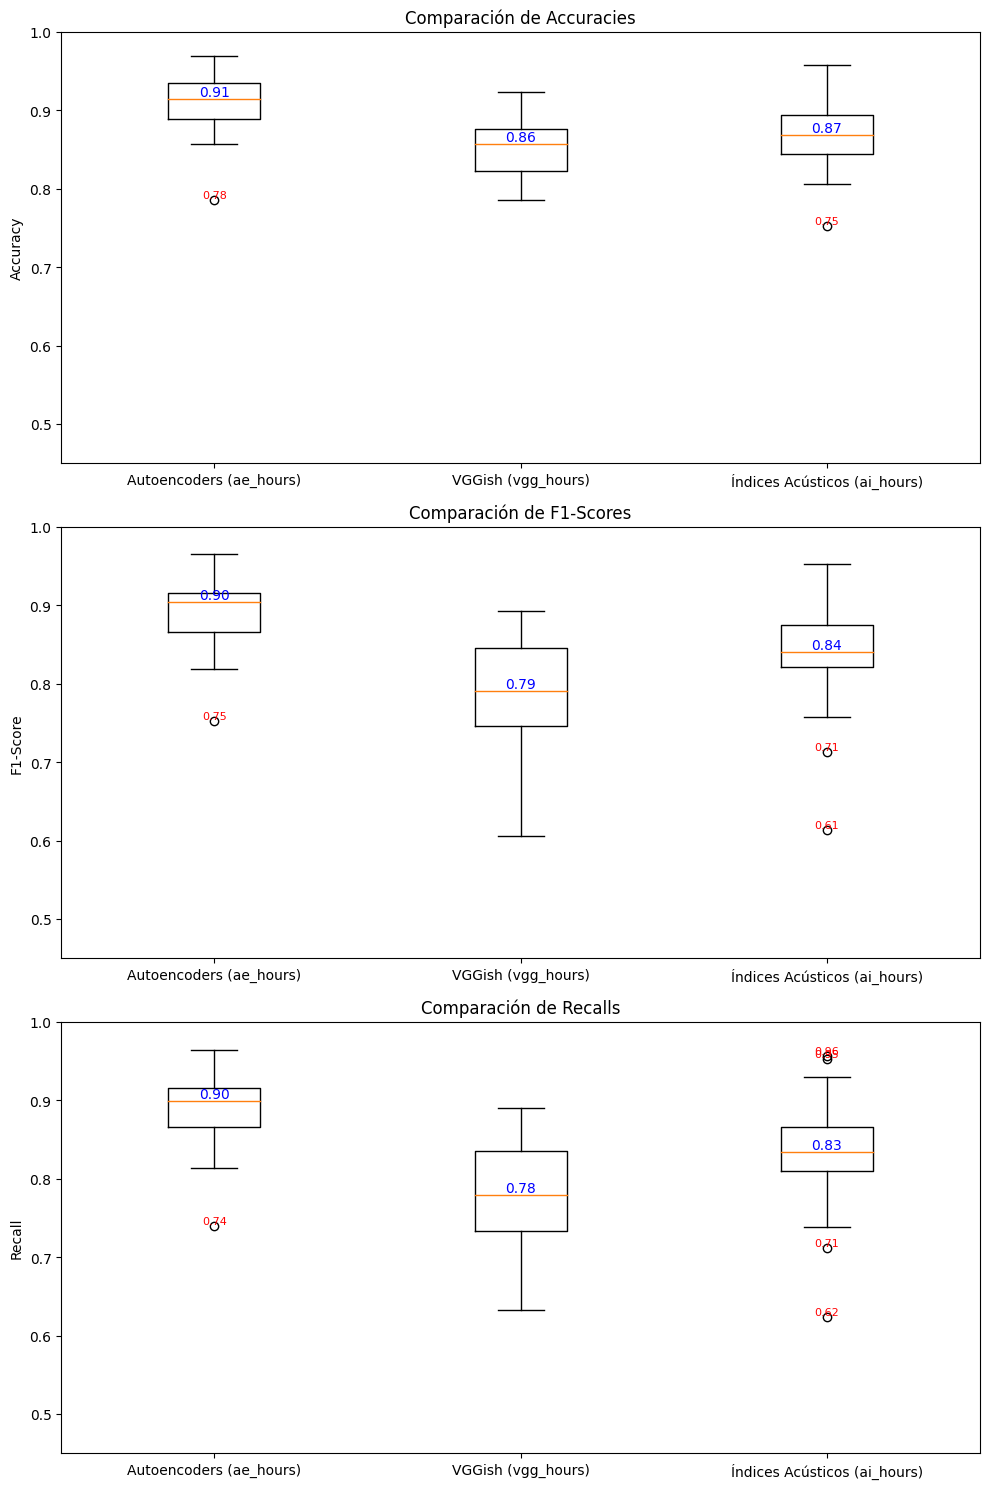

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Establecer límites del eje y
y_min = 0.45
y_max = 1

# Función para agregar anotaciones de mediana y outliers
def add_annotations(ax, data):
    for i, d in enumerate(data):
        # Añadir la mediana
        median = np.median(d)
        ax.text(i + 1, median, f'{median:.2f}', ha='center', va='bottom', color='blue', fontsize=10)
        
        # Añadir los outliers
        outliers = [point for point in d if point > np.percentile(d, 75) + 1.5 * (np.percentile(d, 75) - np.percentile(d, 25)) or point < np.percentile(d, 25) - 1.5 * (np.percentile(d, 75) - np.percentile(d, 25))]
        for outlier in outliers:
            ax.text(i + 1, outlier, f'{outlier:.2f}', ha='center', va='bottom', color='red', fontsize=8)

# Gráfica de accuracies
bp_acc = axs[0].boxplot([accuracies_ae_hours, accuracies_vgg_hours, accuracies_ai_hours], labels=['Autoencoders (ae_hours)', 'VGGish (vgg_hours)', 'Índices Acústicos (ai_hours)'])
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[0], [accuracies_ae_hours, accuracies_vgg_hours, accuracies_ai_hours])

# Gráfica de F1-scores
bp_f1 = axs[1].boxplot([f1_scores_ae_hours, f1_scores_vgg_hours, f1_scores_ai_hours], labels=['Autoencoders (ae_hours)', 'VGGish (vgg_hours)', 'Índices Acústicos (ai_hours)'])
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[1], [f1_scores_ae_hours, f1_scores_vgg_hours, f1_scores_ai_hours])

# Gráfica de Recalls
bp_rec = axs[2].boxplot([recalls_ae_hours, recalls_vgg_hours, recalls_ai_hours], labels=['Autoencoders (ae_hours)', 'VGGish (vgg_hours)', 'Índices Acústicos (ai_hours)'])
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_ylim(y_min, y_max)  # Límite del eje y
add_annotations(axs[2], [recalls_ae_hours, recalls_vgg_hours, recalls_ai_hours])

# Mostrar las gráficas
plt.tight_layout()
plt.show()

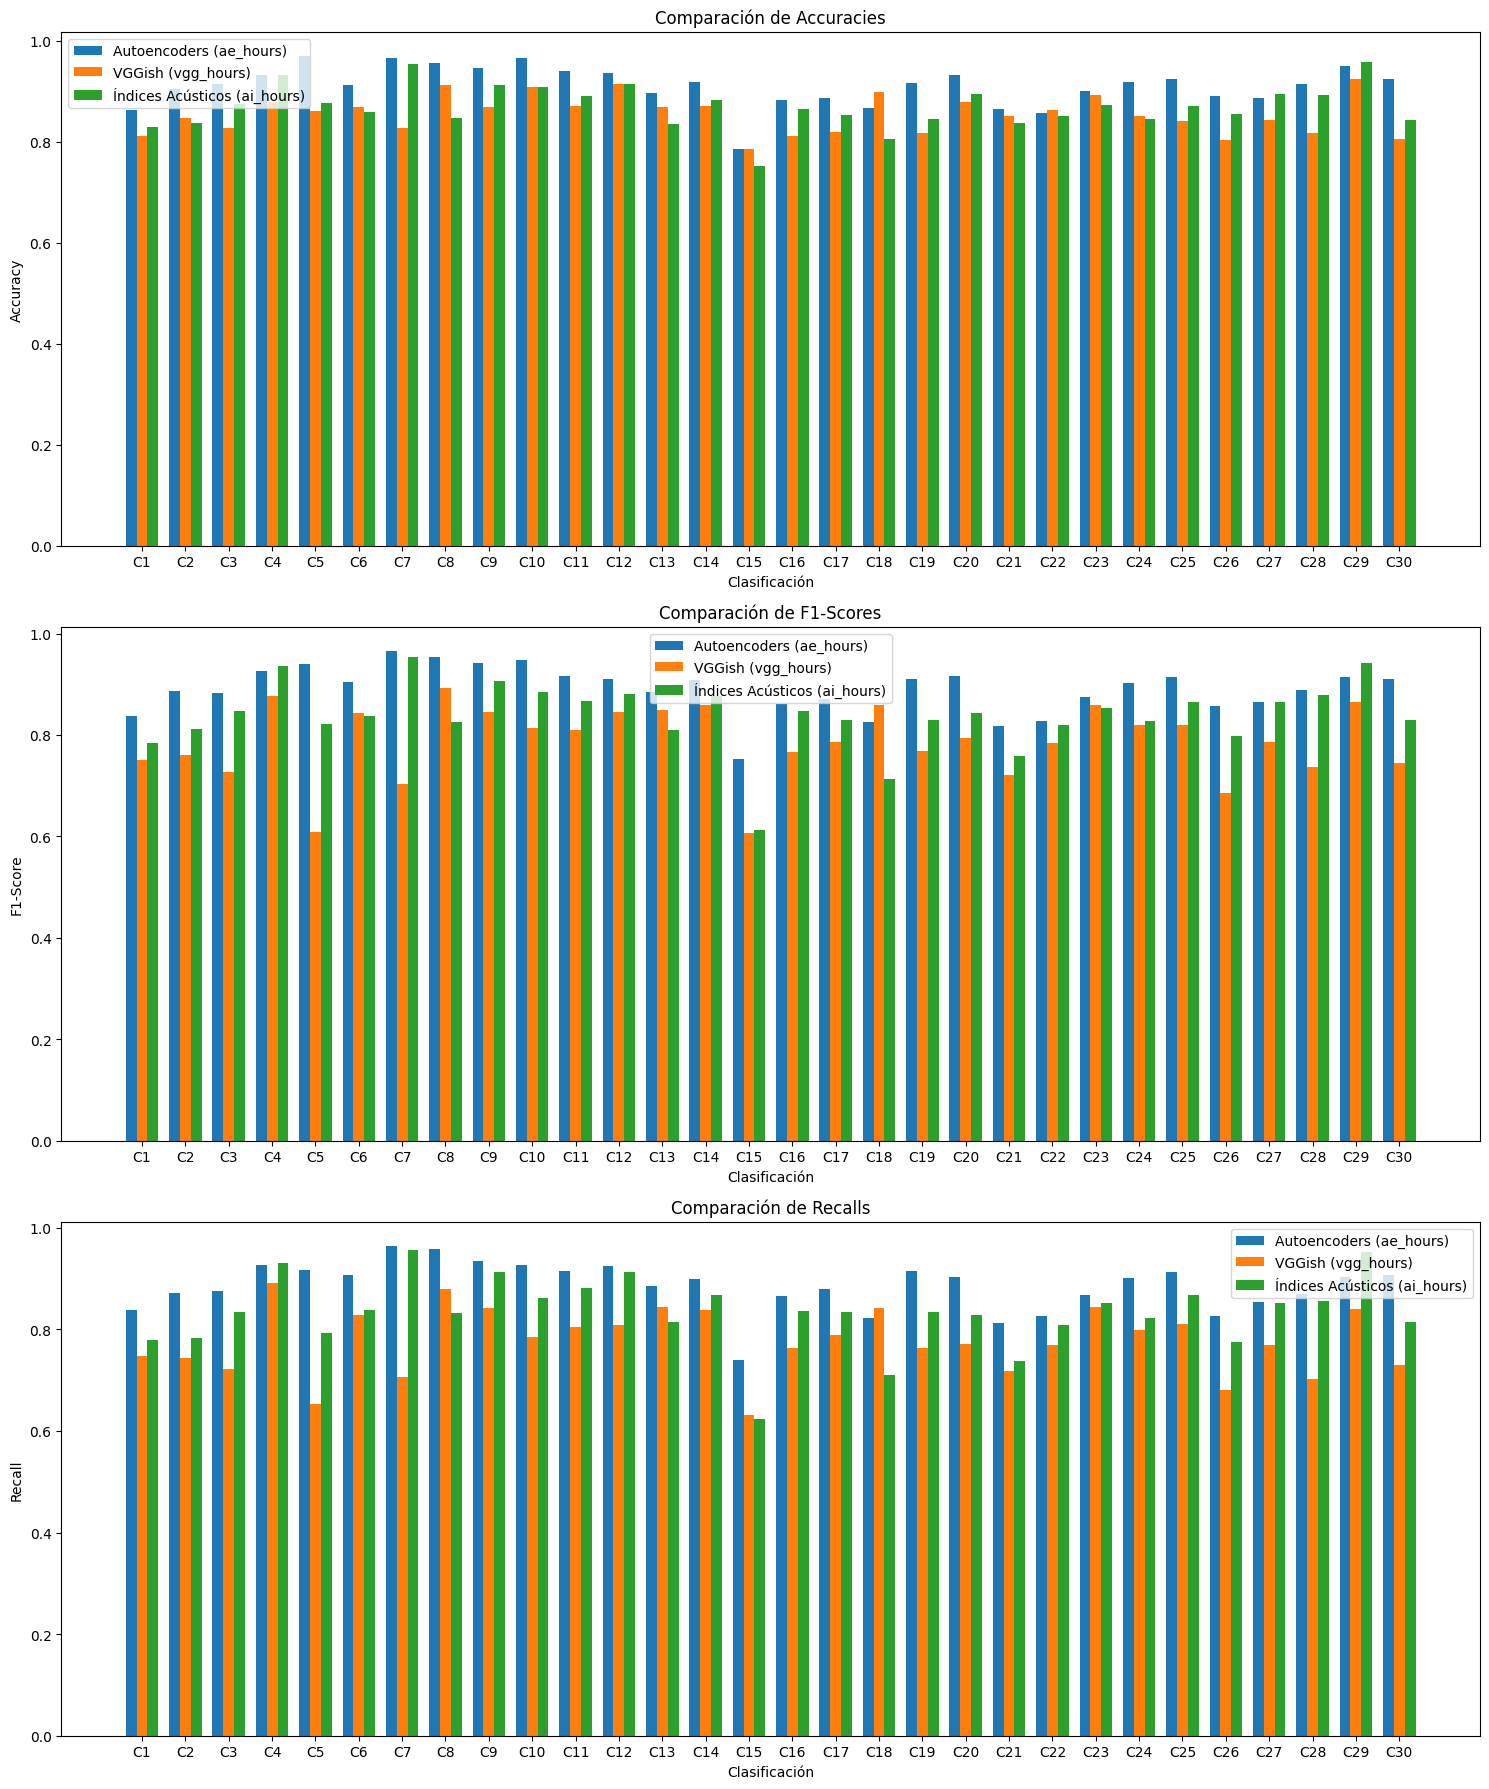

In [20]:
n = len(accuracies_ae_hours)

# Posiciones para las barras
ind = np.arange(n)  # la posición de las barras en el eje X
width = 0.25  # el ancho de las barras

fig, axs = plt.subplots(3, 1, figsize=(15, 18))

# Gráfica de accuracies
axs[0].bar(ind - width, accuracies_ae_hours, width, label='Autoencoders (ae_hours)')
axs[0].bar(ind, accuracies_vgg_hours, width, label='VGGish (vgg_hours)')
axs[0].bar(ind + width, accuracies_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Clasificación')
axs[0].set_xticks(ind)
axs[0].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[0].legend(loc='best')

# Gráfica de F1-scores
axs[1].bar(ind - width, f1_scores_ae_hours, width, label='Autoencoders (ae_hours)')
axs[1].bar(ind, f1_scores_vgg_hours, width, label='VGGish (vgg_hours)')
axs[1].bar(ind + width, f1_scores_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_xlabel('Clasificación')
axs[1].set_xticks(ind)
axs[1].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[1].legend(loc='best')

# Gráfica de Recalls
axs[2].bar(ind - width, recalls_ae_hours, width, label='Autoencoders (ae_hours)')
axs[2].bar(ind, recalls_vgg_hours, width, label='VGGish (vgg_hours)')
axs[2].bar(ind + width, recalls_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_xlabel('Clasificación')
axs[2].set_xticks(ind)
axs[2].set_xticklabels([f'C{i+1}' for i in ind])  # Etiquetas para cada clasificación
axs[2].legend(loc='best')

# Ajustar la disposición de las gráficas
plt.tight_layout()
plt.show()

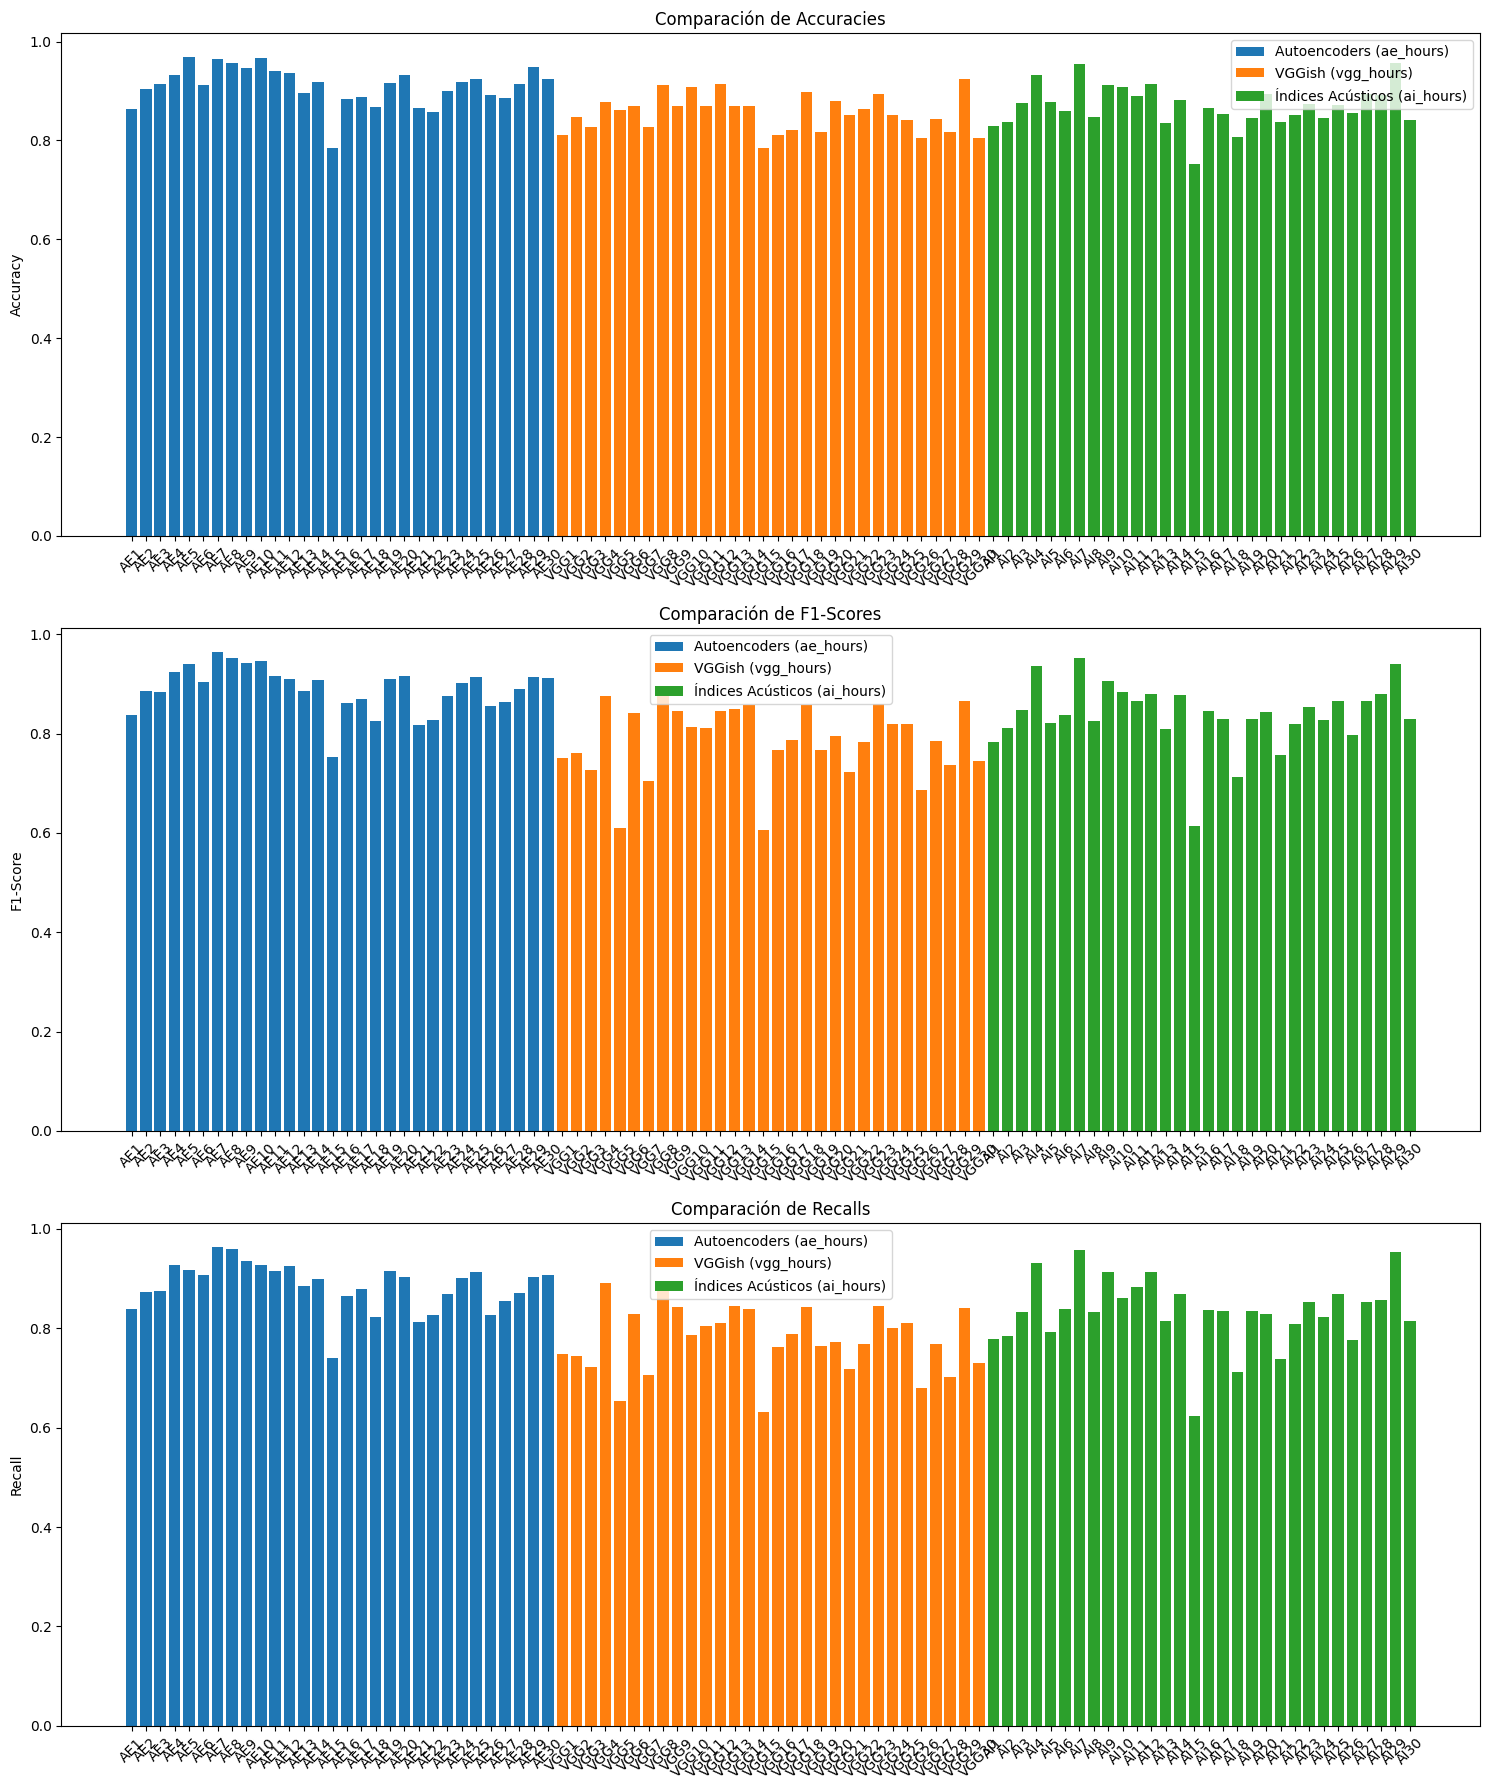

In [21]:
n = len(accuracies_ae_hours)

# Posiciones para las barras en el eje X
ind_ae = np.arange(n)  # Posiciones de las barras para el método AE
ind_vgg = np.arange(n, 2*n)  # Posiciones de las barras para el método VGGish
ind_ai = np.arange(2*n, 3*n)  # Posiciones de las barras para el método AI

# Ancho de las barras
width = 0.8  # el ancho de las barras, más amplio para que las barras estén más juntas dentro de cada grupo

fig, axs = plt.subplots(3, 1, figsize=(15, 18))

# Gráfica de accuracies
axs[0].bar(ind_ae, accuracies_ae_hours, width, label='Autoencoders (ae_hours)')
axs[0].bar(ind_vgg, accuracies_vgg_hours, width, label='VGGish (vgg_hours)')
axs[0].bar(ind_ai, accuracies_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[0].set_title('Comparación de Accuracies')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[0].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[0].legend(loc='best')

# Gráfica de F1-scores
axs[1].bar(ind_ae, f1_scores_ae_hours, width, label='Autoencoders (ae_hours)')
axs[1].bar(ind_vgg, f1_scores_vgg_hours, width, label='VGGish (vgg_hours)')
axs[1].bar(ind_ai, f1_scores_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[1].set_title('Comparación de F1-Scores')
axs[1].set_ylabel('F1-Score')
axs[1].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[1].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[1].legend(loc='best')

# Gráfica de Recalls
axs[2].bar(ind_ae, recalls_ae_hours, width, label='Autoencoders (ae_hours)')
axs[2].bar(ind_vgg, recalls_vgg_hours, width, label='VGGish (vgg_hours)')
axs[2].bar(ind_ai, recalls_ai_hours, width, label='Índices Acústicos (ai_hours)')
axs[2].set_title('Comparación de Recalls')
axs[2].set_ylabel('Recall')
axs[2].set_xticks(np.concatenate([ind_ae, ind_vgg, ind_ai]))
axs[2].set_xticklabels(['AE'+str(i+1) for i in range(n)] + ['VGG'+str(i+1) for i in range(n)] + ['AI'+str(i+1) for i in range(n)], rotation=45)
axs[2].legend(loc='best')

# Ajustar la disposición de las gráficas
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import friedmanchisquare, wilcoxon
friedman_acc = friedmanchisquare(accuracies_ae_hours, accuracies_vgg_hours, accuracies_ai_hours)
friedman_f1 = friedmanchisquare(f1_scores_ae_hours, f1_scores_vgg_hours, f1_scores_ai_hours)
friedman_rec = friedmanchisquare(recalls_ae_hours, recalls_vgg_hours, recalls_ai_hours)

print(f"Friedman Test for Accuracies: Statistic={friedman_acc.statistic}, p-value={friedman_acc.pvalue}")
print(f"Friedman Test for F1-Scores: Statistic={friedman_f1.statistic}, p-value={friedman_f1.pvalue}")
print(f"Friedman Test for Recalls: Statistic={friedman_rec.statistic}, p-value={friedman_rec.pvalue}")

Friedman Test for Accuracies: Statistic=33.43103448275862, p-value=5.502285231461991e-08
Friedman Test for F1-Scores: Statistic=41.866666666666674, p-value=8.105295363086586e-10
Friedman Test for Recalls: Statistic=45.26666666666665, p-value=1.4807039204169627e-10


In [23]:
wilcoxon_acc_ae_vgg = wilcoxon(accuracies_ae_hours, accuracies_vgg_hours)
wilcoxon_acc_ae_ai = wilcoxon(accuracies_ae_hours, accuracies_ai_hours)

wilcoxon_f1_ae_vgg = wilcoxon(f1_scores_ae_hours, f1_scores_vgg_hours)
wilcoxon_f1_ae_ai = wilcoxon(f1_scores_ae_hours, f1_scores_ai_hours)

wilcoxon_rec_ae_vgg = wilcoxon(recalls_ae_hours, recalls_vgg_hours)
wilcoxon_rec_ae_ai = wilcoxon(recalls_ae_hours, recalls_ai_hours)

print(f"Wilcoxon Test Accuracies AE vs VGG: Statistic={wilcoxon_acc_ae_vgg.statistic}, p-value={wilcoxon_acc_ae_vgg.pvalue}")
print(f"Wilcoxon Test Accuracies AE vs AI: Statistic={wilcoxon_acc_ae_ai.statistic}, p-value={wilcoxon_acc_ae_ai.pvalue}")

print(f"Wilcoxon Test F1-Scores AE vs VGG: Statistic={wilcoxon_f1_ae_vgg.statistic}, p-value={wilcoxon_f1_ae_vgg.pvalue}")
print(f"Wilcoxon Test F1-Scores AE vs AI: Statistic={wilcoxon_f1_ae_ai.statistic}, p-value={wilcoxon_f1_ae_ai.pvalue}")

print(f"Wilcoxon Test Recalls AE vs VGG: Statistic={wilcoxon_rec_ae_vgg.statistic}, p-value={wilcoxon_rec_ae_vgg.pvalue}")
print(f"Wilcoxon Test Recalls AE vs AI: Statistic={wilcoxon_rec_ae_ai.statistic}, p-value={wilcoxon_rec_ae_ai.pvalue}")

Wilcoxon Test Accuracies AE vs VGG: Statistic=8.0, p-value=5.896675803378053e-06
Wilcoxon Test Accuracies AE vs AI: Statistic=5.0, p-value=4.3289405000320485e-06
Wilcoxon Test F1-Scores AE vs VGG: Statistic=2.0, p-value=5.587935447692871e-09
Wilcoxon Test F1-Scores AE vs AI: Statistic=13.0, p-value=1.6391277313232422e-07
Wilcoxon Test Recalls AE vs VGG: Statistic=1.0, p-value=3.725290298461914e-09
Wilcoxon Test Recalls AE vs AI: Statistic=17.0, p-value=3.855675458908081e-07


/home/mirp_ai/anaconda3/envs/DANM/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
